In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Read the files 
df = pd.read_csv('nyc_taxi_trip_duration.csv')

In [3]:
# shape of the data
df.shape

(729322, 11)

In [4]:
# first 5 instances 
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
# columns
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
#datatypes
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### Summary
- store_fwd_flag is shown as object but it should be categorical.
- pickup_datetime and dropoff_datetime are of datatyppe which should be converted to datetime for further analysis.
- vendor_id is of datatype int64 but it is a nominal data.


In [7]:
# Typecasting to category
df['vendor_id'] = df['vendor_id'].astype('category')
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')                                         
df.dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
dtype: object

In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [9]:
df.dtypes

id                            object
vendor_id                   category
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag          category
trip_duration                  int64
dtype: object

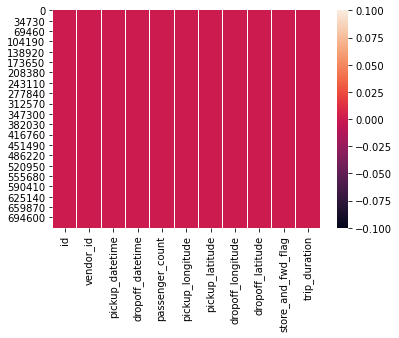

In [10]:
# checking missing values
sb.heatmap(df.isnull())

# Summary
- From the heatmap we can clearly see that there are no missing values.

In [11]:
# Adding a new column distance 

from math import sin, cos, sqrt, atan2, radians
distance_converted = []
def distance_converter(df):
    # number of rows
    n = df.shape[0]
    # approximate radius of earth in km
    R = 6373.0
    for i in range(n):
        lat1 = radians(df['pickup_latitude'][i])
        lat2 = radians(df['dropoff_latitude'][i])
        long1 = radians(df['pickup_longitude'][i])
        long2 = radians(df['dropoff_longitude'][i])
        # calculating the distance
        dlon = long2 - long1
        dlat = lat2 - lat1
        a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = R * c
        # since trip duration is in seconds converting it to miles
        miles = 0.621371 * distance
        distance_converted.append(round(miles,2))
    return distance_converted
    


In [12]:
df['distance'] = pd.Series(distance_converter(df))

In [13]:
df['distance'] = df['distance'].astype('float64')

# Univariate Analysis

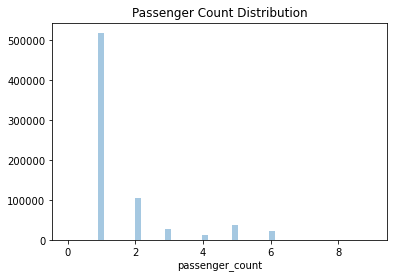

In [14]:
sb.distplot(df['passenger_count'],kde=False) # Updating Kde = False for better visualization
plt.title('Passenger Count Distribution')
plt.show()

# Summary
- Most of the trips has only **1 or 2 passengers** travelling by cab.

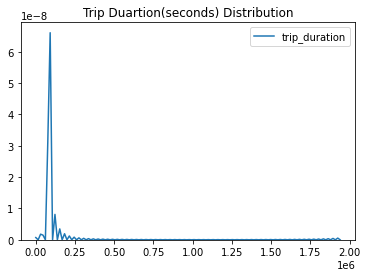

In [15]:
sb.kdeplot(df['trip_duration'])
plt.title('Trip Duartion(seconds) Distribution')
plt.show()

# Summary 
- We can see it is rightskewed data so we can conclude that there are outliers. 

In [16]:
cm_df = df[['trip_duration']]
cm_df = cm_df[cm_df['trip_duration'] < 3*cm_df['trip_duration'].std()]

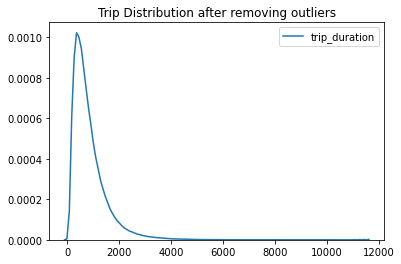

In [17]:
sb.kdeplot(cm_df['trip_duration'])
plt.title('Trip Distribution after removing outliers')
plt.show()

- Even after removal of datapoints which fall above the 3rd standard deviation the plot is still right skewed.

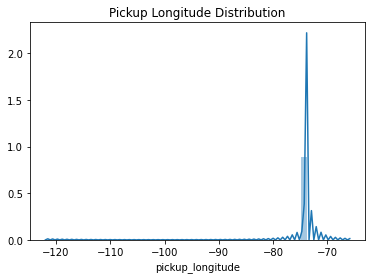

In [18]:
sb.distplot(df['pickup_longitude'])
plt.title('Pickup Longitude Distribution')
plt.show()

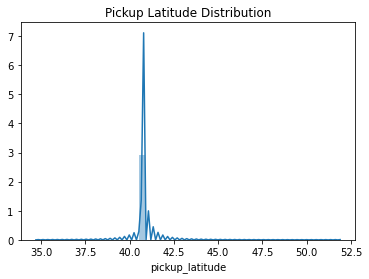

In [19]:
sb.distplot(df['pickup_latitude'])
plt.title('Pickup Latitude Distribution')
plt.show()

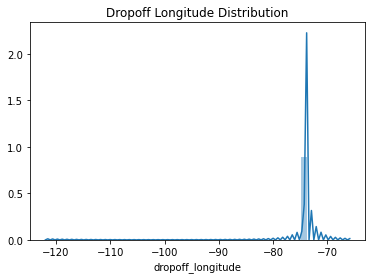

In [20]:
sb.distplot(df['dropoff_longitude'])
plt.title('Dropoff Longitude Distribution')
plt.show()

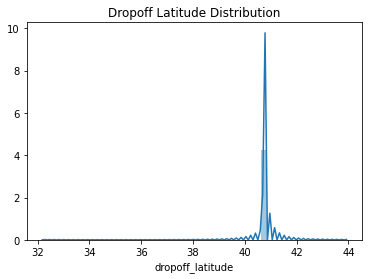

In [21]:
sb.distplot(df['dropoff_latitude'])
plt.title('Dropoff Latitude Distribution')
plt.show()

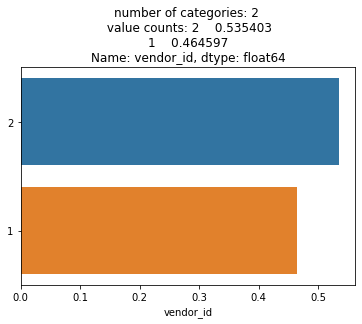

In [22]:
vendor = df['vendor_id'].value_counts(normalize=True)
sb.barplot(vendor,vendor.index,order=vendor.index)
plt.title('Number Of Vendors')
plt.title(f'number of categories: {df["vendor_id"].nunique()} \n value counts: {vendor}')
plt.show()

# Summary 
- Cabs of vendor2 are availed slightly more than vendor1.

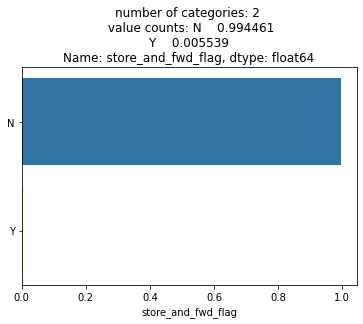

In [23]:
flag = df['store_and_fwd_flag'].value_counts(normalize=True)
sb.barplot(flag,flag.index,order = flag.index)
plt.title(f'number of categories: {df["store_and_fwd_flag"].nunique()} \n value counts: {flag}')
plt.show()

# Summary
- 99% of the times the cab was connected to the server but should be analysed based on the trip duration and distance as well. 

## Extracting day and hours from  the pickup_datetime and dropoff_datetime for further analysis 

In [24]:
df['pickup_hours'] = df['pickup_datetime'].dt.hour
df['dropoff_hours'] = df['dropoff_datetime'].dt.hour
df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day'] = df['dropoff_datetime'].dt.day_name()

In [25]:
Based_on_Hours = ['pickup_hours','dropoff_hours']
Based_on_Days = ['pickup_day','dropoff_day']

In [26]:
def UVA_hours(df,var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size,3),dpi=100)
    
    for j,i in enumerate(var_group):
        
        plt.subplot(1,size,j+1)
        sb.distplot(df[i],bins=24,kde=False)
        plt.xlabel(f'{i}',fontsize=20)
        plt.ylabel('frequency')    

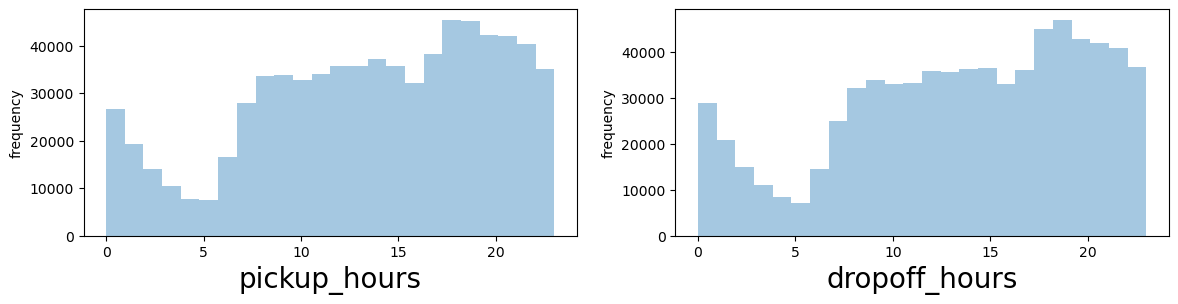

In [27]:
UVA_hours(df,Based_on_Hours)

- We can clearly conclude from the plot that most of the trips are scheduled in evening hours.

In [28]:
def UVA_days(df,var_group):
    size = len(var_group)
    plt.figure(figsize = (7*size,3),dpi=100)
    
    for j,i in enumerate(var_group):
        
        plt.subplot(1,size,j+1)
        sb.countplot(x=i,data=df)
        plt.xlabel(f'{i}',fontsize=20)
        plt.ylabel('frequency')   

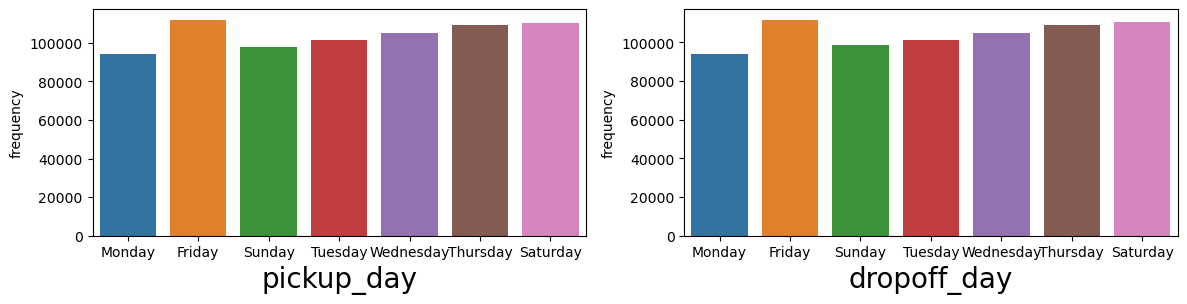

In [29]:
UVA_days(df,Based_on_Days)

- Most of the trips are on Friday,Saturday and Thursday.

# Bivariate Analysis

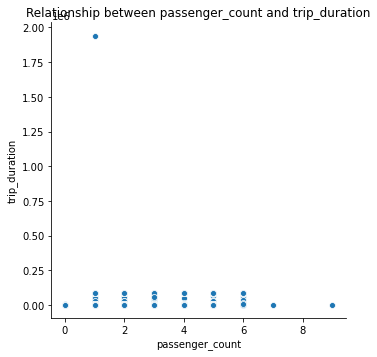

In [30]:
sb.relplot(x='passenger_count',y='trip_duration',data=df,kind='scatter')
plt.title('Relationship between passenger_count and trip_duration')
plt.show()

In [31]:
# Removing the outlier from the trip_duration variable for better analysis
df = df[df.trip_duration!= df.trip_duration.max()]

- From the plot we can see there are  some trips without passengers so let's check in our data.

In [32]:
df[df['passenger_count'] < 1]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,pickup_hours,dropoff_hours,pickup_day,dropoff_day
3572,id3364866,1,2016-02-13 14:04:20,2016-02-13 14:21:29,0,-73.990479,40.742004,-73.989243,40.763680,N,1029,1.50,14,14,Saturday,Saturday
23847,id3485118,1,2016-05-11 19:15:57,2016-05-11 19:32:18,0,-73.987572,40.754566,-73.972031,40.762836,N,981,0.99,19,19,Wednesday,Wednesday
45987,id2571672,1,2016-03-06 05:24:55,2016-03-06 05:25:00,0,-73.979698,40.761196,-73.979698,40.761196,Y,5,0.00,5,5,Sunday,Sunday
76998,id1253169,1,2016-02-28 01:08:48,2016-02-28 01:09:01,0,-74.035942,40.736488,-74.035942,40.736492,N,13,0.00,1,1,Sunday,Sunday
101709,id1220914,2,2016-01-17 20:51:55,2016-01-17 20:52:43,0,-73.959999,40.766861,-73.960106,40.766911,N,48,0.01,20,20,Sunday,Sunday
186050,id3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4,0.01,5,5,Friday,Friday
186913,id3494250,1,2016-04-02 02:32:10,2016-04-02 02:50:51,0,-74.005089,40.729038,-74.032486,40.619579,N,1121,7.70,2,2,Saturday,Saturday
194926,id1205792,1,2016-03-11 12:33:17,2016-03-11 13:09:48,0,-73.982063,40.763798,-74.188072,40.694042,N,2191,11.82,12,13,Friday,Friday
231010,id0959777,2,2016-03-01 19:11:26,2016-03-01 19:11:30,0,-74.003777,40.738186,-74.003807,40.738174,N,4,0.00,19,19,Tuesday,Tuesday
247692,id2891366,1,2016-02-18 21:26:15,2016-02-18 21:28:00,0,-73.983543,40.716404,-73.983543,40.716404,N,105,0.00,21,21,Thursday,Thursday


- It's Strange to see that some trips exist without any passengers. So removing those records for better analysis.

In [33]:
df = df[df['passenger_count'] >= 1]

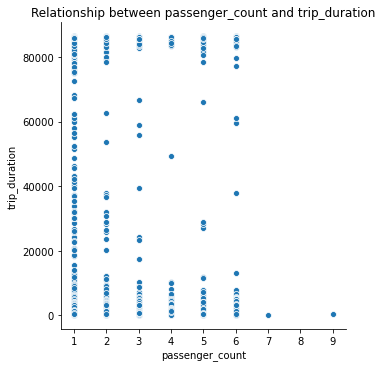

In [34]:
sb.relplot(x='passenger_count',y='trip_duration',data=df,kind='scatter')
plt.title('Relationship between passenger_count and trip_duration')
plt.show()

- From the plot it's clear that there exists no relationship between passenger_count and trip_duration.Trip duration is more for  passenger count 1 and passenger_count greater than 6 i.e., even if the passenger count is high there are no records of long duration trips. 

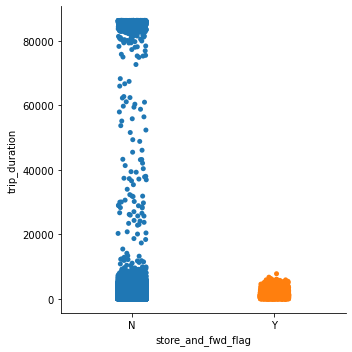

In [35]:
sb.catplot(x='store_and_fwd_flag',y='trip_duration',kind='strip',data=df)

-  so from the plot we can conclude Only short distances had connection issues with the server

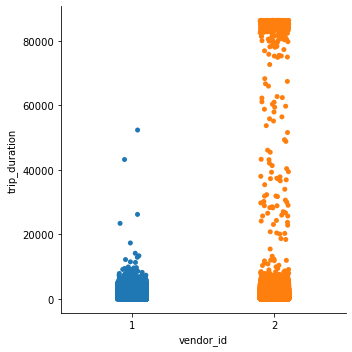

In [36]:
sb.catplot(x='vendor_id',y='trip_duration',kind='strip',data=df)

- Vendor 1 provides cabs  only for short distance trips and Vendor 2 provides cab for all kind of trips.

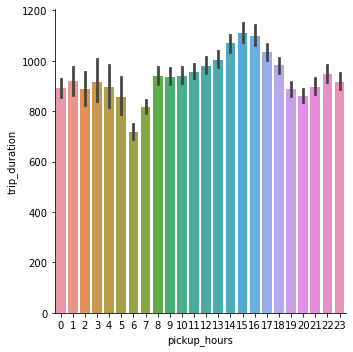

In [37]:
sb.catplot(x='pickup_hours',y='trip_duration',data=df,kind ='bar')

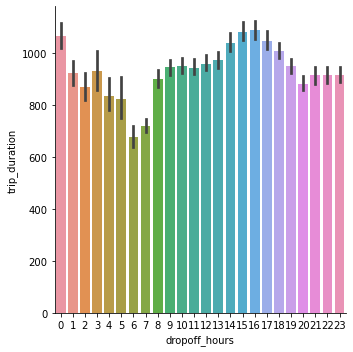

In [38]:
sb.catplot(x='dropoff_hours',y='trip_duration',data=df,kind ='bar')

- The trips that are taken at Zero hour and 14-17 hours have more duration when compared to other hours.

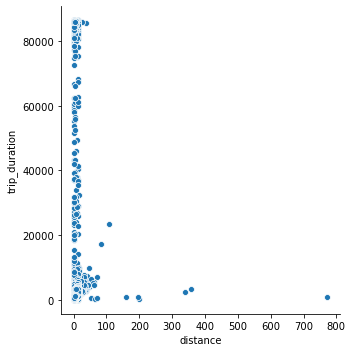

In [39]:
sb.relplot('distance','trip_duration',data=df)

- Trip duration is more or less evenly distributed only for trips < 100 miles.

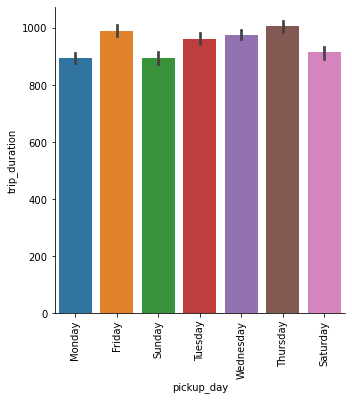

In [40]:
g = sb.catplot(x='pickup_day',y='trip_duration',data=df,kind ='bar',orient='vertical')
g.set_xticklabels(rotation=90)

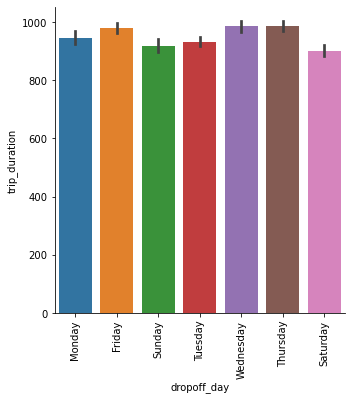

In [41]:
g = sb.catplot(x='dropoff_day',y='trip_duration',data=df,kind ='bar',orient='vertical')
g.set_xticklabels(rotation=90)

- Thus the highest avg time taken to complete a trip is on Wednesday and Thursday while Monday,Tuesday,Saturday and Sunday takes the least time.